# What is Economic Freedom ?
Economic freedom means individuals of the society have freedom to work, produce, consume, and invest. In economically free societies, governments allow labor, capital, and goods to move freely.

## What is Economic Freedom Index ?
 The Index of Economic Freedom documents the positive relationship between economic freedom and a variety of positive social and economic goals. The ideals of economic freedom are strongly associated with healthier societies, cleaner environments, greater per capita wealth, human development, democracy, and poverty elimination.

In [1]:
from sklearn import preprocessing, utils
from sklearn.linear_model import LinearRegression 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('economic_freedom_index2019_data.csv')
data

CountryID Country Name      WEBNAME                        Region  \
0            1  Afghanistan  Afghanistan                  Asia-Pacific   
1            2      Albania      Albania                        Europe   
2            3      Algeria      Algeria  Middle East and North Africa   
3            4       Angola       Angola            Sub-Saharan Africa   
4            5    Argentina    Argentina                      Americas   
..         ...          ...          ...                           ...   
181        179    Venezuela    Venezuela                      Americas   
182        180      Vietnam      Vietnam                  Asia-Pacific   
183        181        Yemen        Yemen  Middle East and North Africa   
184        182       Zambia       Zambia            Sub-Saharan Africa   
185        183     Zimbabwe     Zimbabwe            Sub-Saharan Africa   

     WorldRank  RegionRank  2019Score  Property Rights  Judical Effectiveness  \
0        152.0        39.0       51.5             19.6                   29.6   
1         52.0        27.0       66.5             54.8                   30.6   
2        171.0        14.0       46.2             31.6                   36.2   
3        156.0        33.0       50.6             35.9                   26.6   
4        148.0        26.0       52.2             47.8                   44.5   
..         ...         ...        ...              ...                    ...   
181      179.0        32.0       25.9              7.6                   13.1   
182      128.0        30.0       55.3             49.8                   40.3   
183        NaN         NaN        NaN             19.6                   22.2   
184      138.0        27.0       53.6             45.0                   35.6   
185      175.0        45.0       40.4             29.7                   24.8   

     Government Integrity  ...      Country  PopulationinMillions  \
0                    25.2  ...  Afghanistan                  35.5   
1                    40.4  ...      Albania                   2.9   
2                    28.9  ...      Algeria                  41.5   
3                    20.5  ...       Angola                  28.2   
4                    33.5  ...    Argentina                  44.1   
..                    ...  ...          ...                   ...   
181                   7.9  ...    Venezuela                  31.4   
182                  34.0  ...      Vietnam                  93.6   
183                  20.3  ...        Yemen                  30.0   
184                  32.3  ...       Zambia                  17.2   
185                  15.8  ...     Zimbabwe                  14.9   

     GDPinBillionsPPP  GDP Growth Rate Percent  \
0                69.6                      2.5   
1                36.0                      3.9   
2               632.9                      2.0   
3               190.3                      0.7   
4               920.2                      2.9   
..                ...                      ...   
181             380.7                    -14.0   
182             647.4                      6.8   
183              38.6                    -13.8   
184              68.9                      3.6   
185              34.0                      3.0   

     5 Year GDP Growth Rate Percent  GDPPerCapitaPPP  Unemployment Percent  \
0                               2.9           1958.0                   8.8   
1                               2.5          12507.0                  13.9   
2                               3.1          15237.0                  10.0   
3                               2.9           6753.0                   8.2   
4                               0.7          20876.0                   8.7   
..                              ...              ...                   ...   
181                            -7.8          12114.0                   7.7   
182                             6.2           6913.0                   2.1   
183        

In [3]:
data.columns

Index(['CountryID', 'Country Name', 'WEBNAME', 'Region', 'WorldRank',
       'RegionRank', '2019Score', 'Property Rights', 'Judical Effectiveness',
       'Government Integrity', 'Tax Burden', 'Government Spending',
       'Fiscal Health', 'Business Freedom', 'Labor Freedom',
       'Monetary Freedom', 'Trade Freedom', 'Investment Freedom',
       'Financial Freedom', 'TariffRateinPercentage',
       'IncomeTaxRateinPercentage', 'CorporateTaxRateinPercentage',
       'TaxBurdenPercentofGDP', 'Gov Expenditure percent of GDP', 'Country',
       'PopulationinMillions', 'GDPinBillionsPPP', 'GDP Growth Rate Percent',
       '5 Year GDP Growth Rate Percent', 'GDPPerCapitaPPP',
       'Unemployment Percent', 'Inflation Percent', 'FDI Inflow in Millions',
       'Public Debt Percent of GDP'],
      dtype='object')

In [4]:
data=data.drop(['WEBNAME','Country'],axis=1)

In [5]:
data.set_index('CountryID',inplace=True)

In [6]:
data.drop([184,159,181],axis=0)

Country Name                        Region  WorldRank  RegionRank  \
CountryID                                                                     
1          Afghanistan                  Asia-Pacific      152.0        39.0   
2              Albania                        Europe       52.0        27.0   
3              Algeria  Middle East and North Africa      171.0        14.0   
4               Angola            Sub-Saharan Africa      156.0        33.0   
5            Argentina                      Americas      148.0        26.0   
...                ...                           ...        ...         ...   
178            Vanuatu                  Asia-Pacific      116.0        26.0   
179          Venezuela                      Americas      179.0        32.0   
180            Vietnam                  Asia-Pacific      128.0        30.0   
182             Zambia            Sub-Saharan Africa      138.0        27.0   
183           Zimbabwe            Sub-Saharan Africa      175.0        45.0   

           2019Score  Property Rights  Judical Effectiveness  \
CountryID                                                      
1               51.5             19.6                   29.6   
2               66.5             54.8                   30.6   
3               46.2             31.6                   36.2   
4               50.6             35.9                   26.6   
5               52.2             47.8                   44.5   
...              ...              ...                    ...   
178             56.4             65.9                   36.4   
179             25.9              7.6                   13.1   
180             55.3             49.8                   40.3   
182             53.6             45.0                   35.6   
183             40.4             29.7                   24.8   

           Government Integrity  Tax Burden  Government Spending  ...  \
CountryID                                                         ...   
1                          25.2        91.7                 80.3  ...   
2                          40.4        86.3                 73.9  ...   
3                          28.9        76.4                 48.7  ...   
4                          20.5        83.9                 80.7  ...   
5                          33.5        69.3                 49.5  ...   
...                         ...         ...                  ...  ...   
178                        51.9        97.3                 54.1  ...   
179                         7.9        74.7                 58.1  ...   
180                        34.0        79.7                 74.1  ...   
182                        32.3        72.3                 80.1  ...   
183                        15.8        62.3                 74.5  ...   

           Gov Expenditure percent of GDP  PopulationinMillions  \
CountryID                                                         
1                                    25.6                  35.5   
2                                    29.5                   2.9   
3                                    41.4                  41.5   
4                                    25.3                  28.2   
5                                    41.0                  44.1   
...                                   ...                   ...   
178                                  39.1                   0.3   
179                                  37.4                  31.4   
180                                  29.4                  93.6   
182                                  25.8                  17.2   
183                                  29.2                  14.9   

           GDPinBillionsPPP  GDP Growth Rate Percent  \
CountryID                                              
1                      69.6                      2.5   
2                      36.0                      3.9   
3                     632.9                      2.0   
4                     190.3                    

In [7]:
data

Country Name                        Region  WorldRank  RegionRank  \
CountryID                                                                     
1          Afghanistan                  Asia-Pacific      152.0        39.0   
2              Albania                        Europe       52.0        27.0   
3              Algeria  Middle East and North Africa      171.0        14.0   
4               Angola            Sub-Saharan Africa      156.0        33.0   
5            Argentina                      Americas      148.0        26.0   
...                ...                           ...        ...         ...   
179          Venezuela                      Americas      179.0        32.0   
180            Vietnam                  Asia-Pacific      128.0        30.0   
181              Yemen  Middle East and North Africa        NaN         NaN   
182             Zambia            Sub-Saharan Africa      138.0        27.0   
183           Zimbabwe            Sub-Saharan Africa      175.0        45.0   

           2019Score  Property Rights  Judical Effectiveness  \
CountryID                                                      
1               51.5             19.6                   29.6   
2               66.5             54.8                   30.6   
3               46.2             31.6                   36.2   
4               50.6             35.9                   26.6   
5               52.2             47.8                   44.5   
...              ...              ...                    ...   
179             25.9              7.6                   13.1   
180             55.3             49.8                   40.3   
181              NaN             19.6                   22.2   
182             53.6             45.0                   35.6   
183             40.4             29.7                   24.8   

           Government Integrity  Tax Burden  Government Spending  ...  \
CountryID                                                         ...   
1                          25.2        91.7                 80.3  ...   
2                          40.4        86.3                 73.9  ...   
3                          28.9        76.4                 48.7  ...   
4                          20.5        83.9                 80.7  ...   
5                          33.5        69.3                 49.5  ...   
...                         ...         ...                  ...  ...   
179                         7.9        74.7                 58.1  ...   
180                        34.0        79.7                 74.1  ...   
181                        20.3         NaN                 83.7  ...   
182                        32.3        72.3                 80.1  ...   
183                        15.8        62.3                 74.5  ...   

           Gov Expenditure percent of GDP  PopulationinMillions  \
CountryID                                                         
1                                    25.6                  35.5   
2                                    29.5                   2.9   
3                                    41.4                  41.5   
4                                    25.3                  28.2   
5                                    41.0                  44.1   
...                                   ...                   ...   
179                                  37.4                  31.4   
180                                  29.4                  93.6   
181                                   NaN                  30.0   
182                                  25.8                  17.2   
183                                  29.2                  14.9   

           GDPinBillionsPPP  GDP Growth Rate Percent  \
CountryID                                              
1                      69.6                      2.5   
2                      36.0                      3.9   
3                     632.9                      2.0   
4                     190.3                    

In [8]:
data[data['Country Name']=='India']

Country Name        Region  WorldRank  RegionRank  2019Score  \
CountryID                                                                
74               India  Asia-Pacific      129.0        31.0       55.2   

           Property Rights  Judical Effectiveness  Government Integrity  \
CountryID                                                                 
74                    57.3                   61.6                  47.8   

           Tax Burden  Government Spending  ...  \
CountryID                                   ...   
74               79.4                 77.3  ...   

           Gov Expenditure percent of GDP  PopulationinMillions  \
CountryID                                                         
74                                   27.5                1316.9   

           GDPinBillionsPPP  GDP Growth Rate Percent  \
CountryID                                              
74                   9459.0                      6.7   

           5 Year GDP Growth Rate Percent  GDPPerCapitaPPP  \
CountryID                                                    
74                                    7.2           7183.0   

           Unemployment Percent  Inflation Percent  FDI Inflow in Millions  \
CountryID                                                                    
74                          3.5                3.6                 39916.1   

           Public Debt Percent of GDP  
CountryID                              
74                               70.2  

[1 rows x 31 columns]

In [9]:
data.isnull().sum()

Country Name                      0
Region                            0
WorldRank                         6
RegionRank                        6
2019Score                         6
Property Rights                   1
Judical Effectiveness             1
Government Integrity              1
Tax Burden                        6
Government Spending               3
Fiscal Health                     3
Business Freedom                  1
Labor Freedom                     2
Monetary Freedom                  2
Trade Freedom                     4
Investment Freedom                2
Financial Freedom                 5
TariffRateinPercentage            4
IncomeTaxRateinPercentage         3
CorporateTaxRateinPercentage      3
TaxBurdenPercentofGDP             7
Gov Expenditure percent of GDP    4
PopulationinMillions              0
GDPinBillionsPPP                  1
GDP Growth Rate Percent           2
5 Year GDP Growth Rate Percent    3
GDPPerCapitaPPP                   2
Unemployment Percent        

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 1 to 183
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Name                    186 non-null    object 
 1   Region                          186 non-null    object 
 2   WorldRank                       180 non-null    float64
 3   RegionRank                      180 non-null    float64
 4   2019Score                       180 non-null    float64
 5   Property Rights                 185 non-null    float64
 6   Judical Effectiveness           185 non-null    float64
 7   Government Integrity            185 non-null    float64
 8   Tax Burden                      180 non-null    float64
 9   Government Spending             183 non-null    float64
 10  Fiscal Health                   183 non-null    float64
 11  Business Freedom                185 non-null    float64
 12  Labor Freedom                   184 

In [11]:
data.describe()

WorldRank  RegionRank   2019Score  Property Rights  \
count  180.000000  180.000000  180.000000       185.000000   
mean    90.500000   20.538889   60.768333        52.327568   
std     52.105662   12.738611   11.255725        19.608526   
min      1.000000    1.000000    5.900000         7.600000   
25%     45.750000    9.750000   53.950000        37.000000   
50%     90.500000   19.500000   60.750000        50.100000   
75%    135.250000   31.000000   67.800000        65.900000   
max    180.000000   47.000000   90.200000        97.400000   

       Judical Effectiveness  Government Integrity  Tax Burden  \
count             185.000000            185.000000  180.000000   
mean               44.899459             41.470270   77.212778   
std                18.104745             19.793193   13.208314   
min                 5.000000              7.900000    0.000000   
25%                31.000000             27.200000   70.975000   
50%                42.900000             35.500000   78.050000   
75%                54.700000             50.300000   85.425000   
max                92.400000             96.700000   99.800000   

       Government Spending  Fiscal Health  Business Freedom  ...  \
count           183.000000     183.000000        185.000000  ...   
mean             64.203825      65.996721         63.514054  ...   
std              23.150984      31.764160         15.799326  ...   
min               0.000000       0.000000          5.000000  ...   
25%              51.700000      39.900000         54.100000  ...   
50%              68.800000      80.300000         64.300000  ...   
75%              82.600000      91.450000         75.000000  ...   
max              96.600000     100.000000         96.400000  ...   

       Gov Expenditure percent of GDP  PopulationinMillions  GDPinBillionsPPP  \
count                      182.000000            186.000000        185.000000   
mean                        33.863736            244.242473        686.977297   
std                         15.476484           2787.112748       2409.537410   
min                         10.600000              0.100000          0.200000   
25%                         24.675000              2.725000         25.300000   
50%                         32.350000              9.150000         78.600000   
75%                         40.225000             29.875000        380.700000   
max                        139.200000          38000.000000      23159.100000   

       GDP Growth Rate Percent  5 Year GDP Growth Rate Percent  \
count               184.000000                      183.000000   
mean                  3.470109                        2.984153   
std                   5.835732                        2.926503   
min                 -14.000000                      -16.100000   
25%                   1.800000                        1.900000   
50%                   3.200000                        3.000000   
75%                   4.650000                        4.450000   
max                  70.800000                        9.900000   

       GDPPerCapitaPPP  Unemployment Percent  Inflation Percent  \
count       184.000000            181.000000         182.000000   
mean      21296.918478              7.396685          10.586264   
std       23930.081283              5.682848          80.507501   
min         677.000000              0.100000          -0.900000   
25%        4385.750000              3.700000           1.300000   
50%       12697.500000              5.700000           2.750000   
75%       29745.000000              9.400000           5.450000   
max      139100.000000             27.300000        1087.500000   

       FDI Inflow in Millions  Public Debt Percent of GDP  
count              181.000000                  182.000000  
mean              7911.153039                   56.469231  
std              25984.794434                   34.163855  
min              -8296.900000                    0.000000  
25%         

In [12]:
data.count()

Country Name                      186
Region                            186
WorldRank                         180
RegionRank                        180
2019Score                         180
Property Rights                   185
Judical Effectiveness             185
Government Integrity              185
Tax Burden                        180
Government Spending               183
Fiscal Health                     183
Business Freedom                  185
Labor Freedom                     184
Monetary Freedom                  184
Trade Freedom                     182
Investment Freedom                184
Financial Freedom                 181
TariffRateinPercentage            182
IncomeTaxRateinPercentage         183
CorporateTaxRateinPercentage      183
TaxBurdenPercentofGDP             179
Gov Expenditure percent of GDP    182
PopulationinMillions              186
GDPinBillionsPPP                  185
GDP Growth Rate Percent           184
5 Year GDP Growth Rate Percent    183
GDPPerCapita

<AxesSubplot:ylabel='CountryID'>

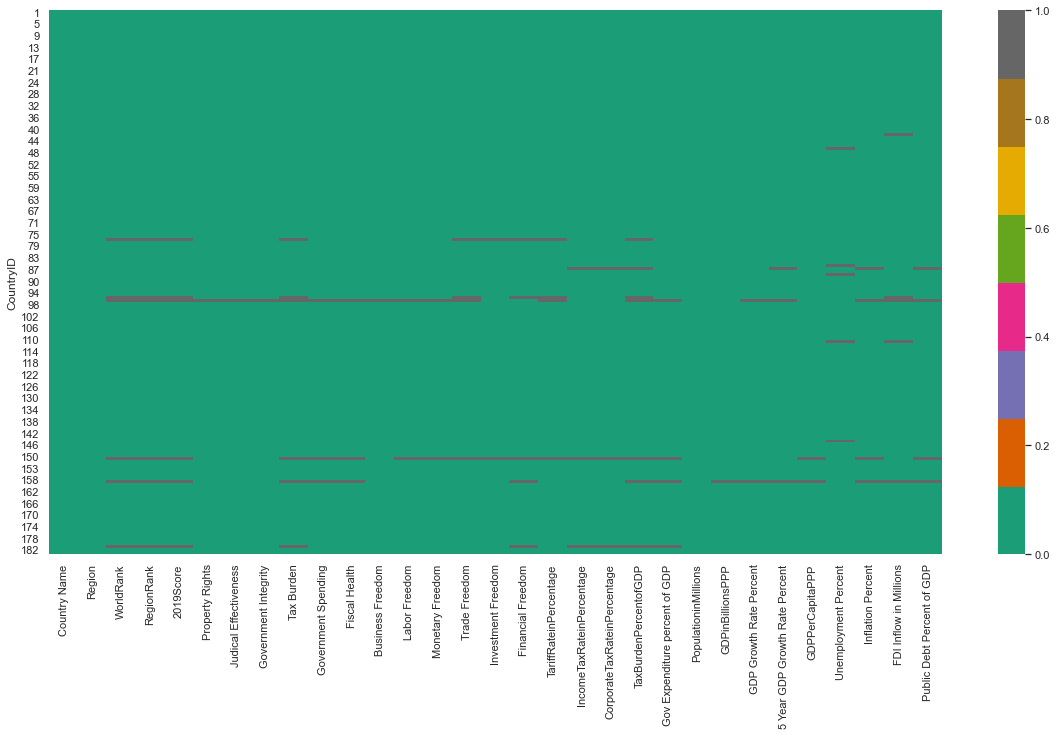

In [33]:
encoder = preprocessing.LabelEncoder()

for i in data.columns:
    if isinstance(data[i][1], str):
            data[i] = encoder.fit_transform(data[i])

sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(data.isnull(),cmap='Dark2')

array([[<AxesSubplot:title={'center':'WorldRank'}>,
        <AxesSubplot:title={'center':'RegionRank'}>,
        <AxesSubplot:title={'center':'2019Score'}>,
        <AxesSubplot:title={'center':'Property Rights'}>,
        <AxesSubplot:title={'center':'Judical Effectiveness'}>],
       [<AxesSubplot:title={'center':'Government Integrity'}>,
        <AxesSubplot:title={'center':'Tax Burden'}>,
        <AxesSubplot:title={'center':'Government Spending'}>,
        <AxesSubplot:title={'center':'Fiscal Health'}>,
        <AxesSubplot:title={'center':'Business Freedom'}>],
       [<AxesSubplot:title={'center':'Labor Freedom'}>,
        <AxesSubplot:title={'center':'Monetary Freedom'}>,
        <AxesSubplot:title={'center':'Trade Freedom'}>,
        <AxesSubplot:title={'center':'Investment Freedom'}>,
        <AxesSubplot:title={'center':'Financial Freedom'}>],
       [<AxesSubplot:title={'center':'TariffRateinPercentage'}>,
        <AxesSubplot:title={'center':'IncomeTaxRateinPercentage'}>,


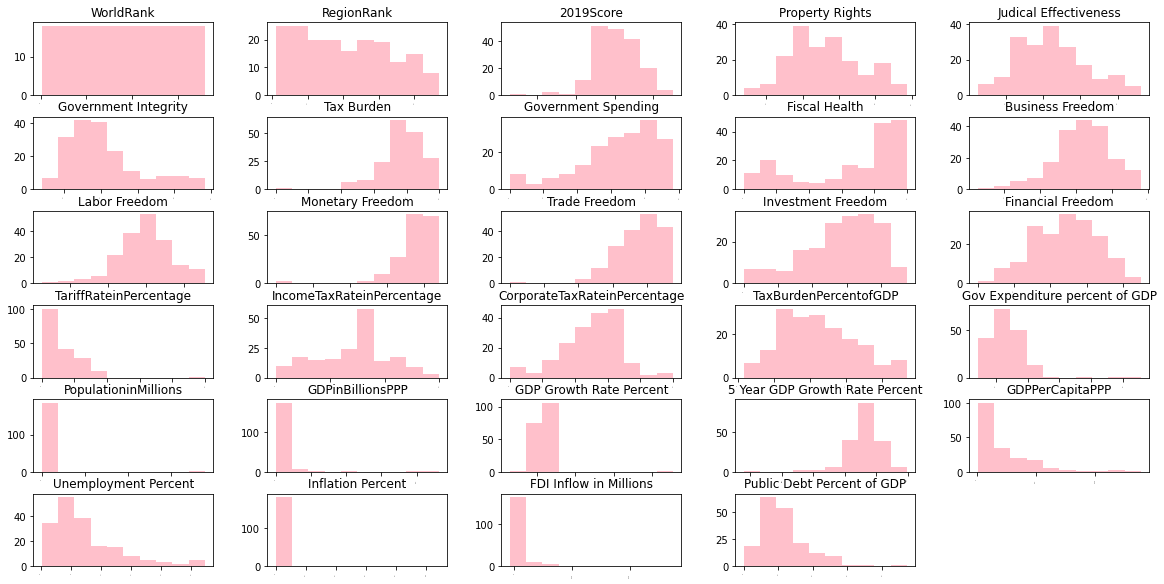

In [13]:
data.hist(grid=False,figsize = (20,10),color='pink', xrot=90, xlabelsize=1 )

In [44]:
data.Region.value_counts()

Sub-Saharan Africa              48
Europe                          45
Asia-Pacific                    43
Americas                        32
Middle East and North Africa    18
Name: Region, dtype: int64

In [45]:
region=data.groupby(['Region','Country Name','WorldRank']).groups
region=pd.DataFrame.from_dict(region)
region.columns.to_frame().reset_index(drop=True)

0          1      2
0              Americas  Argentina  148.0
1              Americas    Bahamas   76.0
2              Americas   Barbados   67.0
3              Americas     Belize  123.0
4              Americas    Bolivia  173.0
..                  ...        ...    ...
181  Sub-Saharan Africa   Tanzania   94.0
182  Sub-Saharan Africa       Togo  158.0
183  Sub-Saharan Africa     Uganda   95.0
184  Sub-Saharan Africa     Zambia  138.0
185  Sub-Saharan Africa   Zimbabwe  175.0

[186 rows x 3 columns]

# Top 5 countries of every region:

In [46]:
rr=data.sort_values(['RegionRank'],ascending=[1])
rr.head(25)

Country Name                        Region  WorldRank  \
CountryID                                                                  
29                       Canada                      Americas        8.0   
158                 Switzerland                        Europe        4.0   
71                    Hong Kong                  Asia-Pacific        1.0   
173        United Arab Emirates  Middle East and North Africa        9.0   
109                   Mauritius            Sub-Saharan Africa       25.0   
79                       Israel  Middle East and North Africa       27.0   
147                   Singapore                  Asia-Pacific        2.0   
175               United States                      Americas       12.0   
137                      Rwanda            Sub-Saharan Africa       32.0   
78                      Ireland                        Europe        6.0   
174              United Kingdom                        Europe        7.0   
21                     Botswana            Sub-Saharan Africa       36.0   
33                        Chile                      Americas       18.0   
120                 New Zealand                  Asia-Pacific        3.0   
134                       Qatar  Middle East and North Africa       28.0   
73                      Iceland                        Europe       11.0   
30                   Cabo Verde            Sub-Saharan Africa       73.0   
138                 Saint Lucia                      Americas       38.0   
7                     Australia                  Asia-Pacific        5.0   
83                       Jordan  Middle East and North Africa       53.0   
160                      Taiwan                  Asia-Pacific       10.0   
119                 Netherlands                        Europe       13.0   
11                      Bahrain  Middle East and North Africa       54.0   
40                Côte d'Ivoire            Sub-Saharan Africa       78.0   
81                      Jamaica                      Americas       39.0   

           RegionRank  2019Score  Property Rights  Judical Effectiveness  \
CountryID                                                                  
29                1.0       77.7             87.0                   69.4   
158               1.0       81.9             85.3                   82.0   
71                1.0       90.2             93.3                   75.3   
173               1.0       77.6             81.8                   87.1   
109               1.0       73.0             69.5                   62.1   
79                2.0       72.8             80.0                   73.4   
147               2.0       89.4             97.4                   92.4   
175               2.0       76.8             79.3                   78.6   
137               2.0       71.1             72.2                   83.2   
78                2.0       80.5             85.8                   68.4   
174               3.0       78.9             92.3                   85.9   
21                3.0       69.5             58.1                   45.7   
33                3.0       75.4             68.7                   56.3   
120               3.0       84.4             95.0                   83.5   
134               3.0       72.6             64.5                   60.0   
73                4.0       77.1             87.4                   63.8   
30                4.0       63.1             44.1                   49.0   
138               4.0       68.7             65.9                   63.8   
7                 4.0       80.9             79.1                   86.5   
83                4.0       66.5             58.4                   52.6   
160               5.0       77.3             85.4                   70.1   
119               5.0       76.8             88.0                   74.7   
11                5.0       66.4             63.5                   50.7   
40                5.0       62.4             40.9                 

<AxesSubplot:xlabel='Region', ylabel='count'>

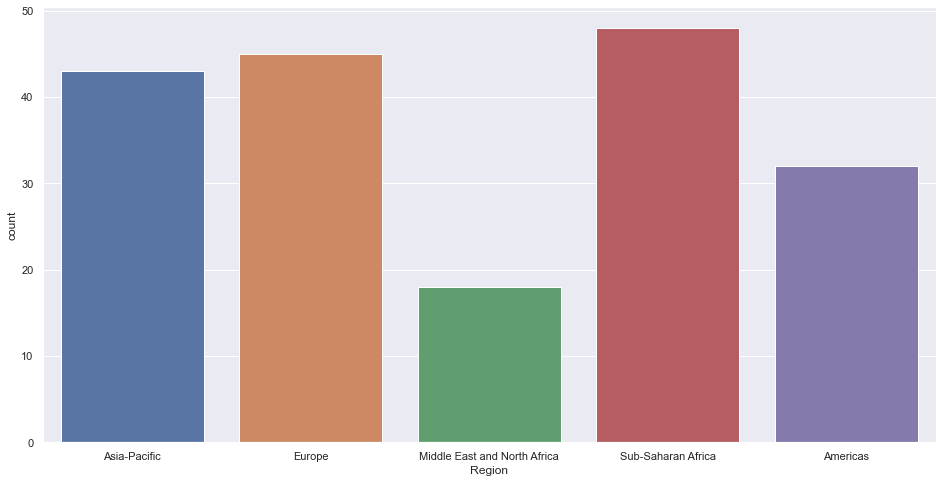

In [47]:
sns.set(rc={'figure.figsize':(16,8)})
sns.countplot(data.Region)

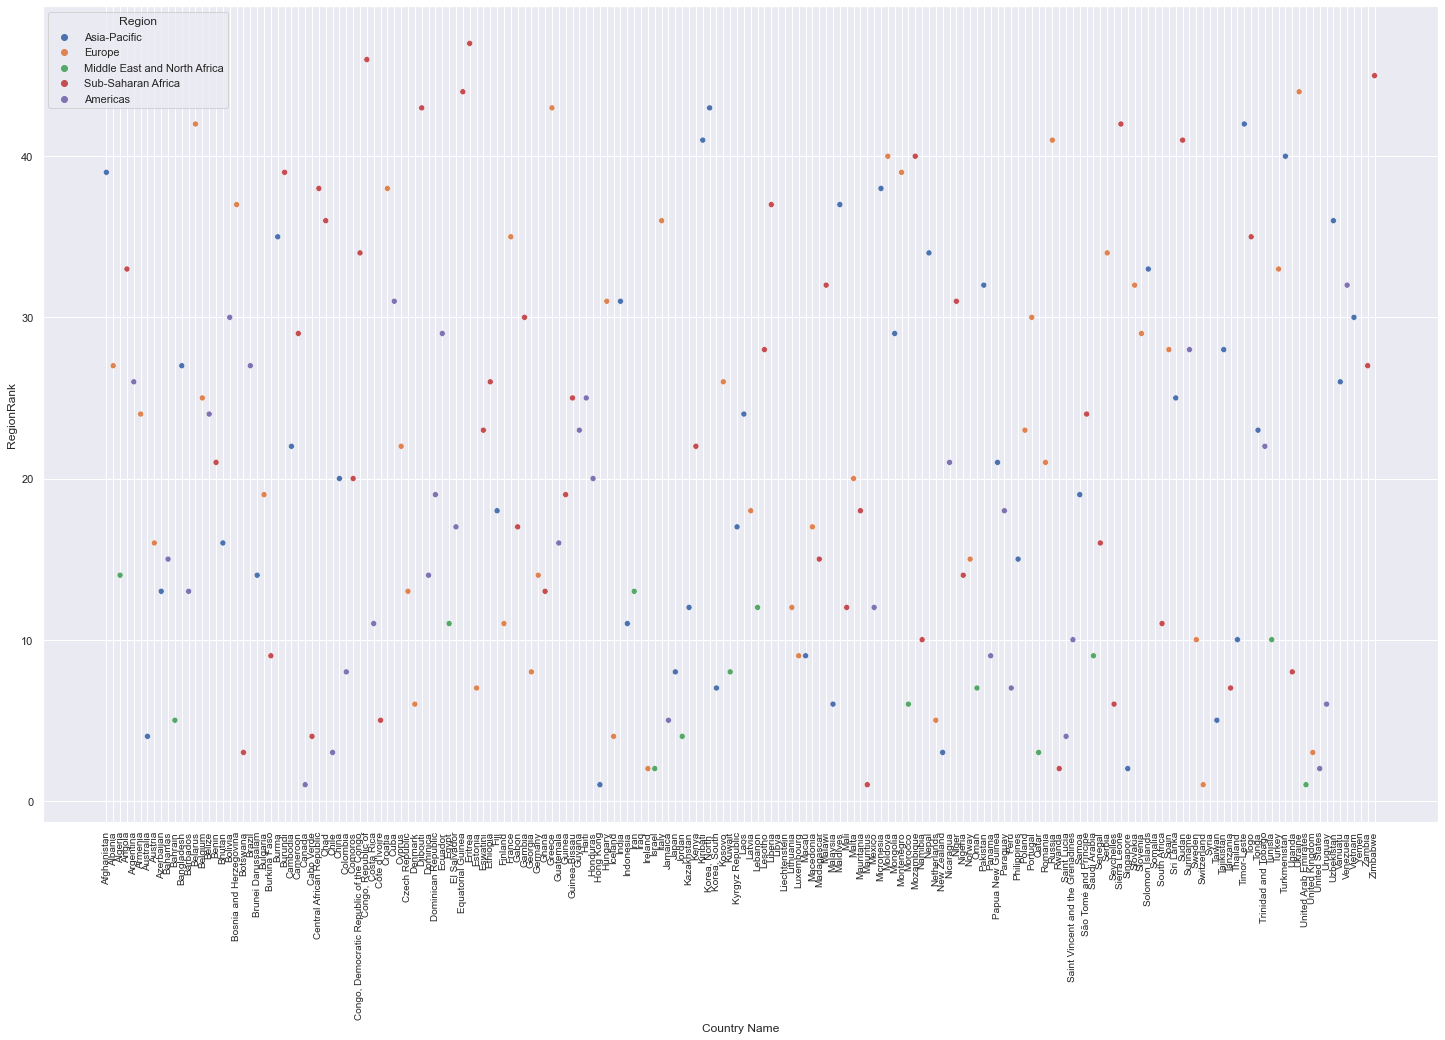

In [43]:
#how to mark specific value in scatter plot -for example, if India needs to be marked in the below scatter plot
sns.set(rc={'figure.figsize':(25,15)})
sc=sns.scatterplot(data['Country Name'],data['RegionRank'], hue='Region', data = data)
sc.tick_params(axis='x',labelrotation=90,labelsize='small')

# World's Top 25 performing countries: as per the 'Economic Freedom Index'

In [9]:
wr=data.sort_values(['WorldRank'],ascending=[1])
wr_top25=wr.head(25)
wr_top25

Country Name                        Region  WorldRank  \
CountryID                                                                  
71                    Hong Kong                  Asia-Pacific        1.0   
147                   Singapore                  Asia-Pacific        2.0   
120                 New Zealand                  Asia-Pacific        3.0   
158                 Switzerland                        Europe        4.0   
7                     Australia                  Asia-Pacific        5.0   
78                      Ireland                        Europe        6.0   
174              United Kingdom                        Europe        7.0   
29                       Canada                      Americas        8.0   
173        United Arab Emirates  Middle East and North Africa        9.0   
160                      Taiwan                  Asia-Pacific       10.0   
73                      Iceland                        Europe       11.0   
175               United States                      Americas       12.0   
119                 Netherlands                        Europe       13.0   
45                      Denmark                        Europe       14.0   
54                      Estonia                        Europe       15.0   
61                      Georgia                        Europe       16.0   
99                   Luxembourg                        Europe       17.0   
33                        Chile                      Americas       18.0   
157                      Sweden                        Europe       19.0   
57                      Finland                        Europe       20.0   
98                    Lithuania                        Europe       21.0   
104                    Malaysia                  Asia-Pacific       22.0   
44               Czech Republic                        Europe       23.0   
62                      Germany                        Europe       24.0   
109                   Mauritius            Sub-Saharan Africa       25.0   

           RegionRank  2019Score  Property Rights  Judical Effectiveness  \
CountryID                                                                  
71                1.0       90.2             93.3                   75.3   
147               2.0       89.4             97.4                   92.4   
120               3.0       84.4             95.0                   83.5   
158               1.0       81.9             85.3                   82.0   
7                 4.0       80.9             79.1                   86.5   
78                2.0       80.5             85.8                   68.4   
174               3.0       78.9             92.3                   85.9   
29                1.0       77.7             87.0                   69.4   
173               1.0       77.6             81.8                   87.1   
160               5.0       77.3             85.4                   70.1   
73                4.0       77.1             87.4                   63.8   
175               2.0       76.8             79.3                   78.6   
119               5.0       76.8             88.0                   74.7   
45                6.0       76.7             86.2                   77.8   
54                7.0       76.6             81.5                   76.0   
61                8.0       75.9             65.9                   54.6   
99                9.0       75.9             83.0                   72.4   
33                3.0       75.4             68.7                   56.3   
157              10.0       75.2             89.5                   84.0   
57               11.0       74.9             89.6                   81.2   
98               12.0       74.2             73.6                   61.2   
104               6.0       74.0             84.1                   68.2   
44               13.0       73.7             74.8                   47.6   
62               14.0       73.5             79.9                 

In [50]:
wr_top25.Region.value_counts()

Europe                          14
Asia-Pacific                     6
Americas                         3
Sub-Saharan Africa               1
Middle East and North Africa     1
Name: Region, dtype: int64

<AxesSubplot:xlabel='Region', ylabel='count'>

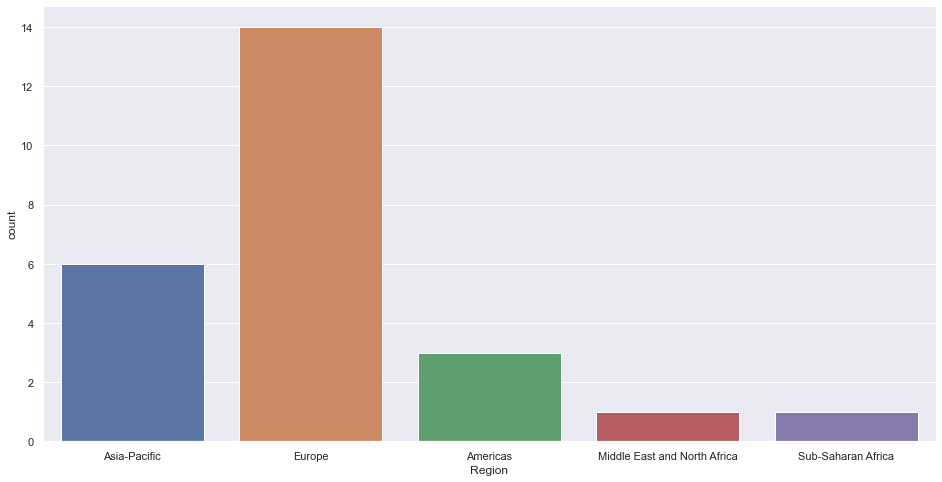

In [51]:
plt.figure(figsize=(16,8))
sns.countplot(wr_top25.Region)

# World's Least 25 performing countries: as per the 'Economic Freedom Index'

In [52]:
wr_least25=wr.tail(25)
wr_least25

Country Name                        Region  WorldRank  \
CountryID                                                                
26                    Burundi            Sub-Saharan Africa      162.0   
116                Mozambique            Sub-Saharan Africa      163.0   
170              Turkmenistan                  Asia-Pacific      164.0   
155                  Suriname                      Americas      165.0   
154                     Sudan            Sub-Saharan Africa      166.0   
146              Sierra Leone            Sub-Saharan Africa      167.0   
86                   Kiribati                  Asia-Pacific      168.0   
46                   Djibouti            Sub-Saharan Africa      169.0   
49                    Ecuador                      Americas      170.0   
3                     Algeria  Middle East and North Africa      171.0   
164               Timor-Leste                  Asia-Pacific      172.0   
19                    Bolivia                      Americas      173.0   
52          Equatorial Guinea            Sub-Saharan Africa      174.0   
183                  Zimbabwe            Sub-Saharan Africa      175.0   
38         Congo, Republic of            Sub-Saharan Africa      176.0   
53                    Eritrea            Sub-Saharan Africa      177.0   
42                       Cuba                      Americas      178.0   
179                 Venezuela                      Americas      179.0   
87              Korea, North                   Asia-Pacific      180.0   
77                       Iraq  Middle East and North Africa        NaN   
96                      Libya  Middle East and North Africa        NaN   
97              Liechtenstein                        Europe        NaN   
184                   Somalia            Sub-Saharan Africa        NaN   
159                     Syria  Middle East and North Africa        NaN   
181                     Yemen  Middle East and North Africa        NaN   

           RegionRank  2019Score  Property Rights  Judical Effectiveness  \
CountryID                                                                  
26               39.0       48.9             20.6                   31.0   
116              40.0       48.6             33.9                   35.2   
170              40.0       48.4             31.6                   29.8   
155              28.0       48.1             49.1                   22.2   
154              41.0       47.7             27.5                   22.2   
146              42.0       47.5             35.5                   34.5   
86               41.0       47.3             44.1                   34.3   
46               43.0       47.1             29.7                   18.1   
49               29.0       46.9             35.9                   20.2   
3                14.0       46.2             31.6                   36.2   
164              42.0       44.2             29.7                   13.1   
19               30.0       42.3             20.5                   12.3   
52               44.0       41.0             29.7                   18.1   
183              45.0       40.4             29.7                   24.8   
38               46.0       39.7             33.2                   29.6   
53               47.0       38.9             35.5                   18.1   
42               31.0       27.8             31.6                   10.0   
179              32.0       25.9              7.6                   13.1   
87               43.0        5.9             31.6                    5.0   
77                NaN        NaN             37.0                   12.3   
96                NaN        NaN              7.6                   24.4   
97                NaN        NaN              NaN                    NaN   
184               NaN        NaN             33.7                   26.6   
159               NaN        NaN             37.0                   24.4   
181               NaN        NaN          

In [53]:
wr_least25.Region.value_counts()

Sub-Saharan Africa              10
Americas                         5
Middle East and North Africa     5
Asia-Pacific                     4
Europe                           1
Name: Region, dtype: int64

<AxesSubplot:xlabel='Region', ylabel='count'>

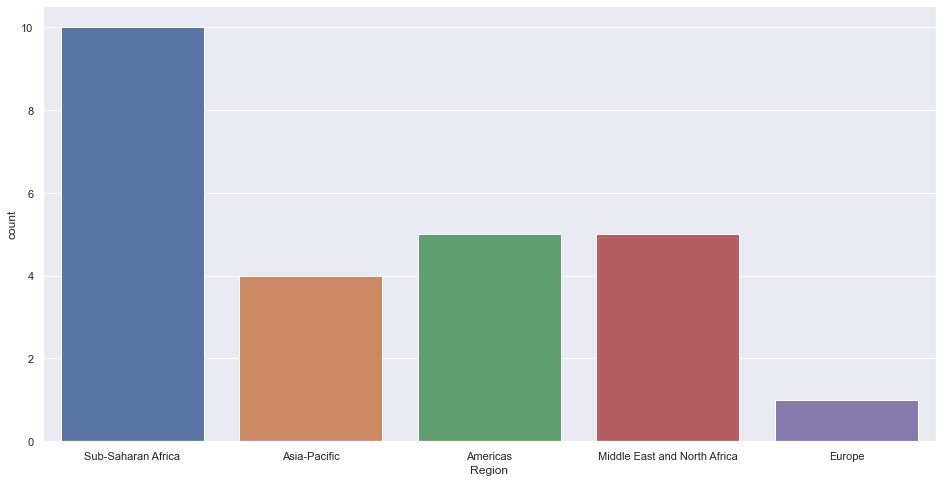

In [54]:
plt.figure(figsize=(16,8))
sns.countplot(wr_least25.Region)

<AxesSubplot:xlabel='Region', ylabel='WorldRank'>

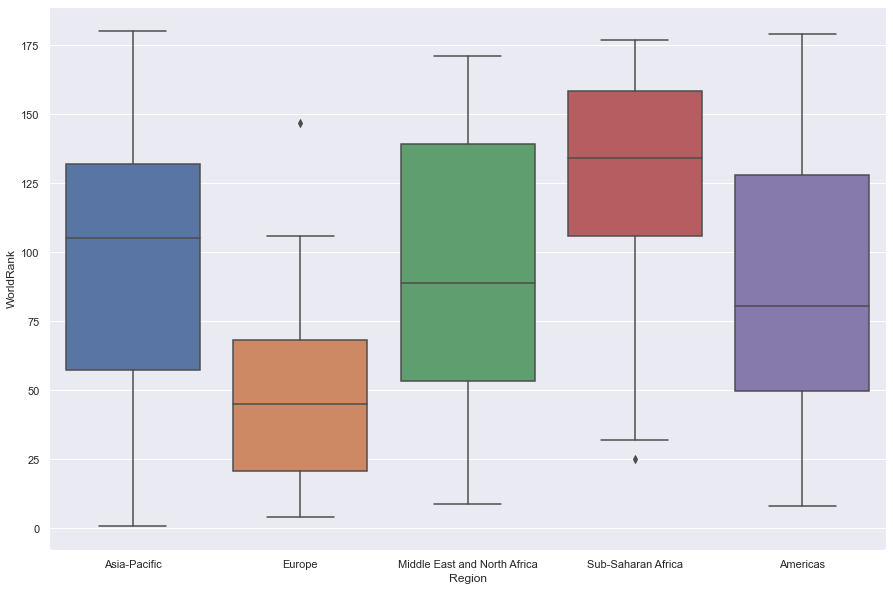

In [55]:
sns.boxplot(x=('Region'), y=('WorldRank'), data=data )

# Inference-

1. Most of the top performing countries of the world are in Europe region. 14 out of 25 countries lie in this region which is almost 50% of the top performing countries.
2. Most of the least performing countries of the world are in Sub-Saharan region. 10 out of 25 countries lie in this region which is 40% of the least performing countries.
3. Average performing countries are divided among the Asian-Pacific, Middle East & North African and American region.

# Economic Freedom Index Scores Countries on the basis of 12 factors:

1. Property Rights
2. Judicial Effectiveness
3. Government Integrity
4. Tax Burden
5. Government Spending
6. Fiscal Health
7. Business Freedom
8. Labour Freedom
9. Monetary Freedom
10. Trade Freedom
11. Investment Freedom
12. Financial Freedom

## Now, we will analyis the World Rank for the countries on the basis of these 12 factors.

In [35]:
a = data.drop(['Country Name','RegionRank', '2019Score','TariffRateinPercentage',
       'IncomeTaxRateinPercentage', 'CorporateTaxRateinPercentage',
       'TaxBurdenPercentofGDP', 'Gov Expenditure percent of GDP',
       'PopulationinMillions', 'GDPinBillionsPPP', 'GDP Growth Rate Percent',
       '5 Year GDP Growth Rate Percent', 'GDPPerCapitaPPP',
       'Unemployment Percent', 'Inflation Percent', 'FDI Inflow in Millions',
       'Public Debt Percent of GDP'],axis=1)
a.columns

Index(['Region', 'WorldRank', 'Property Rights', 'Judical Effectiveness',
       'Government Integrity', 'Tax Burden', 'Government Spending',
       'Fiscal Health', 'Business Freedom', 'Labor Freedom',
       'Monetary Freedom', 'Trade Freedom', 'Investment Freedom',
       'Financial Freedom'],
      dtype='object')

# Visualization of Correlation among 12 factors and the World Rank

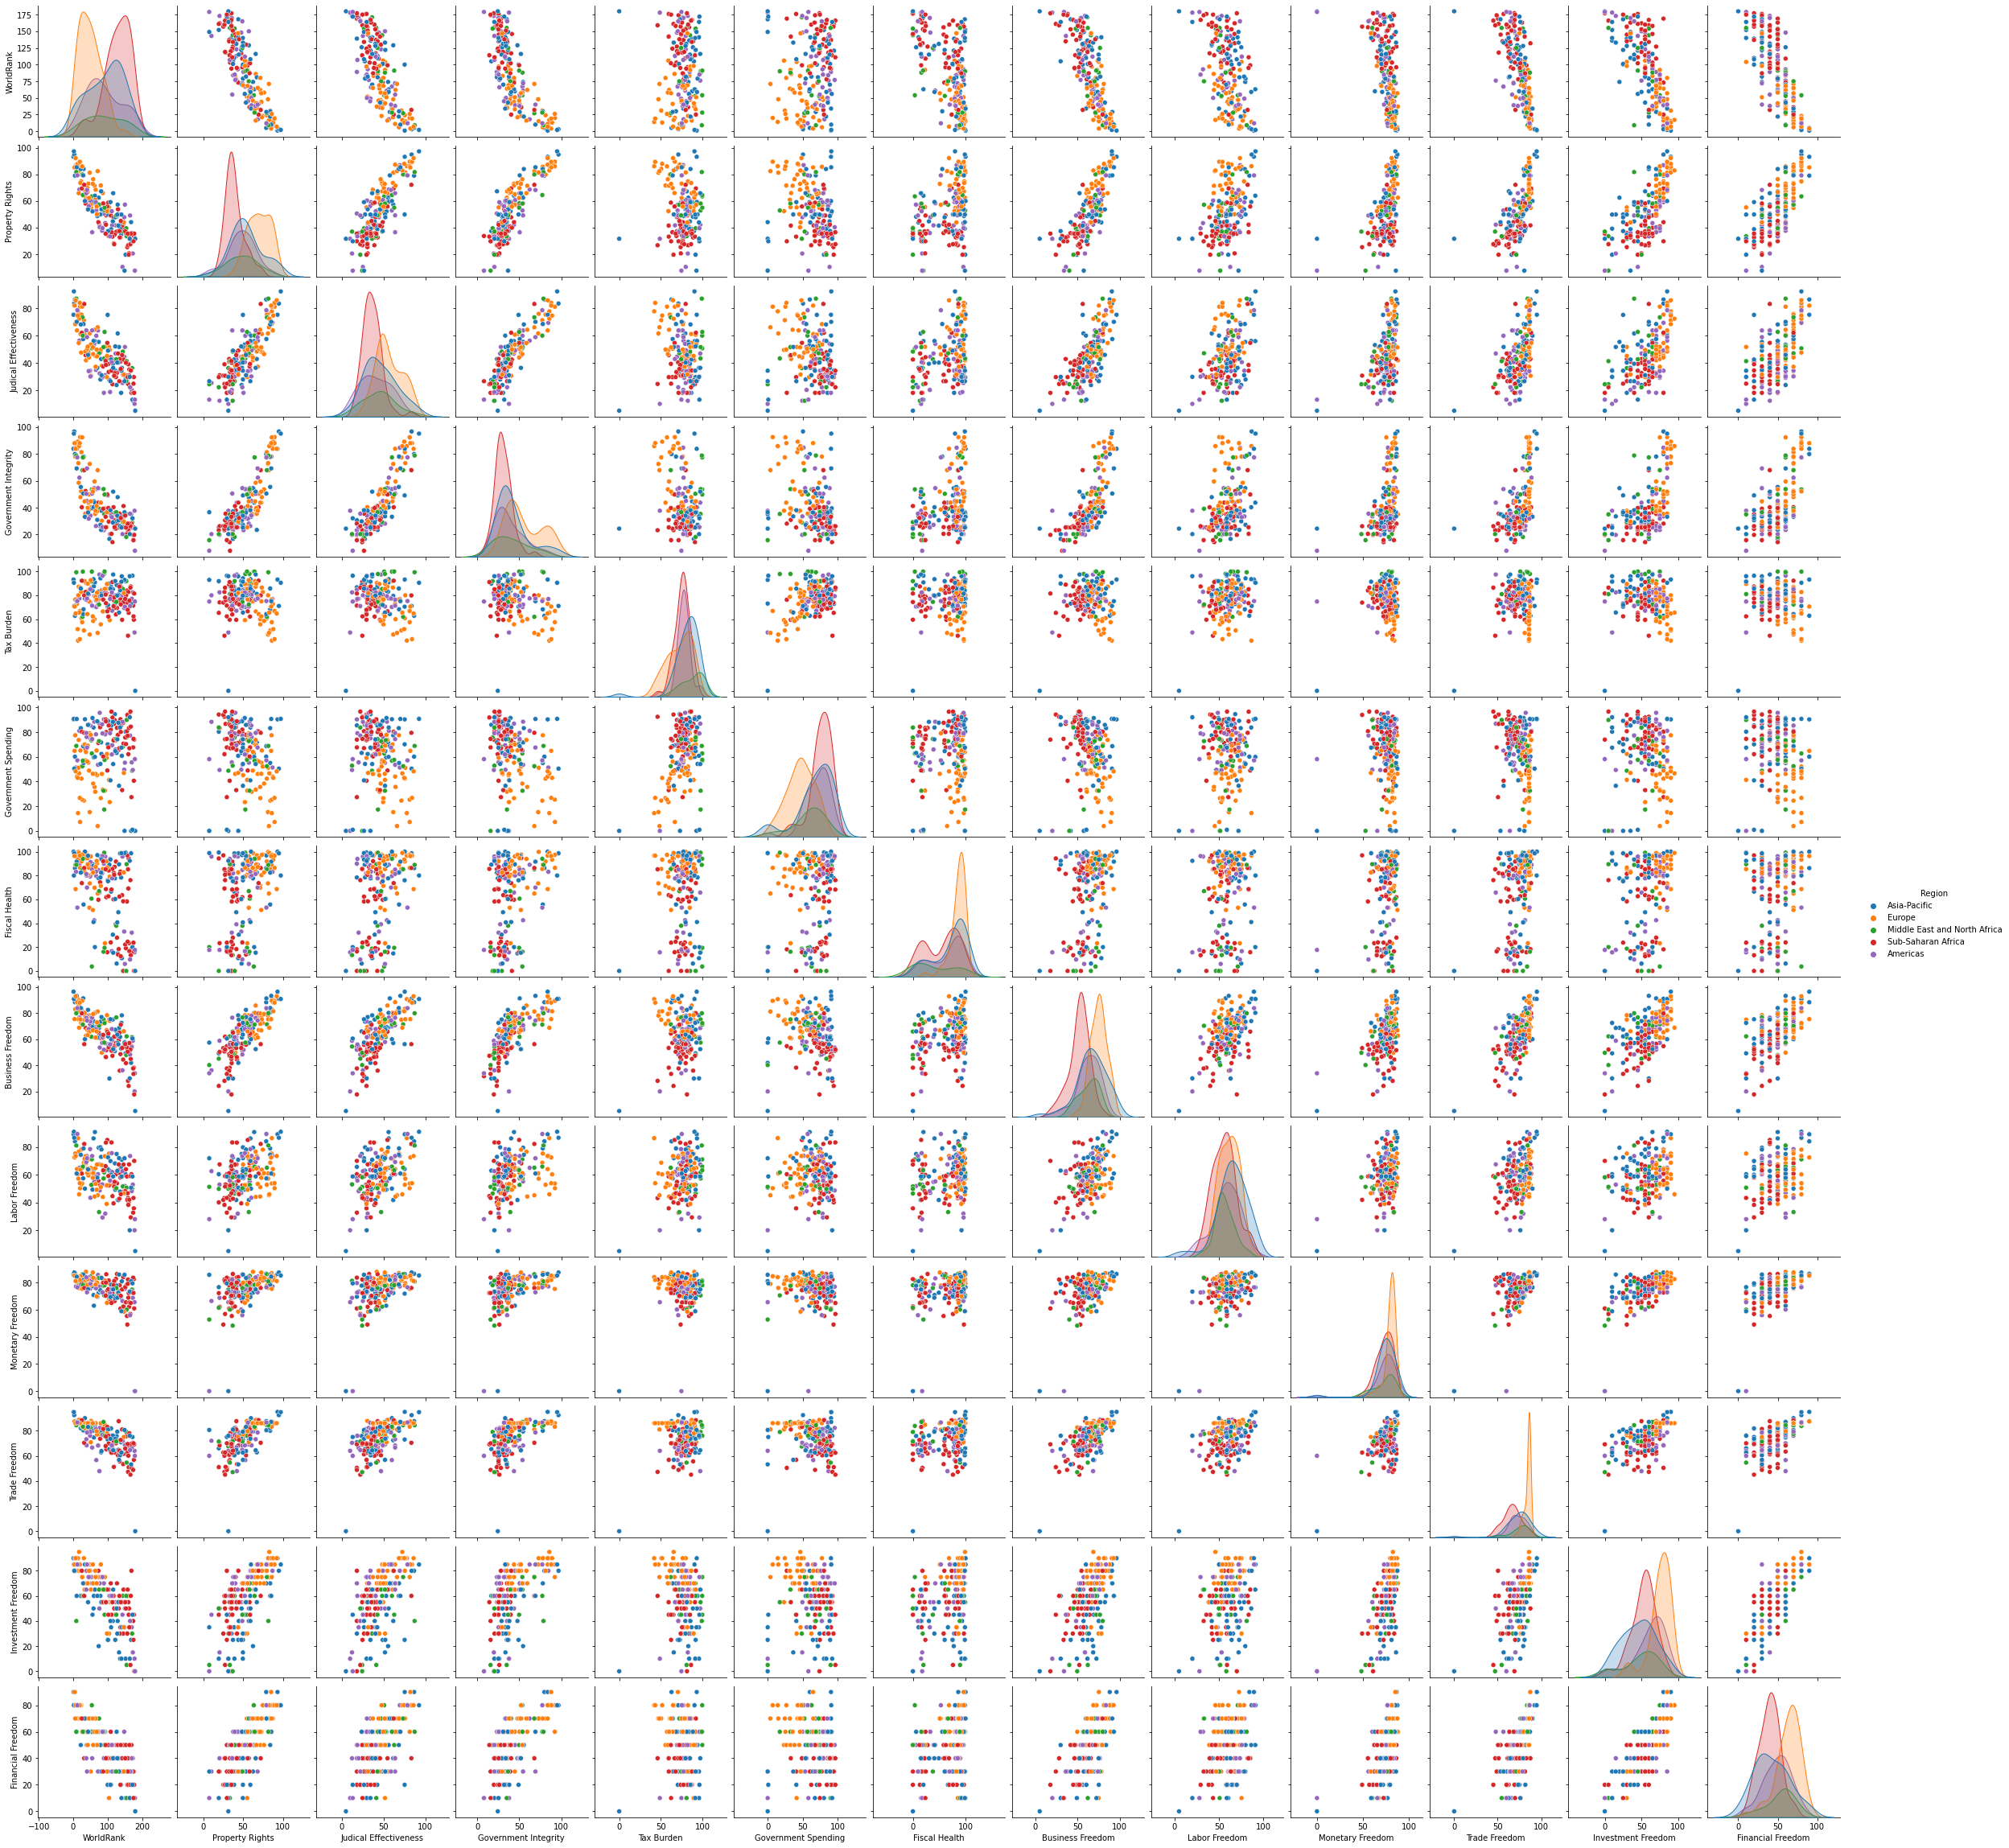

In [43]:
sns.pairplot(data=a ,hue='Region')

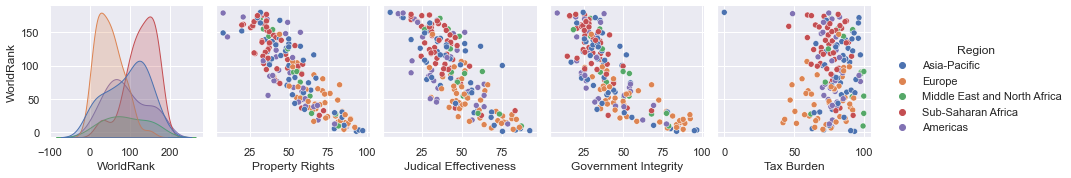

In [57]:
sns.pairplot(data=a , x_vars=['WorldRank','Property Rights', 'Judical Effectiveness',
                              'Government Integrity', 'Tax Burden'], y_vars='WorldRank',hue='Region')

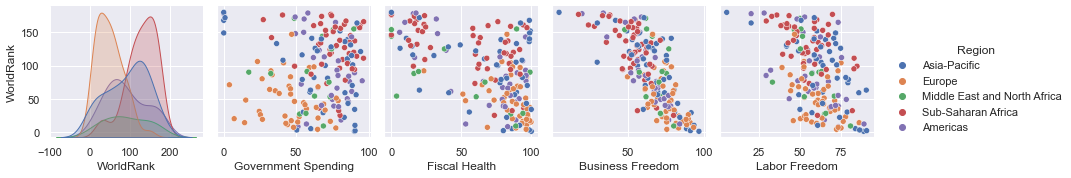

In [58]:
sns.pairplot(data=a , x_vars=[ 'WorldRank','Government Spending',
       'Fiscal Health', 'Business Freedom', 'Labor Freedom',], y_vars='WorldRank',hue='Region')

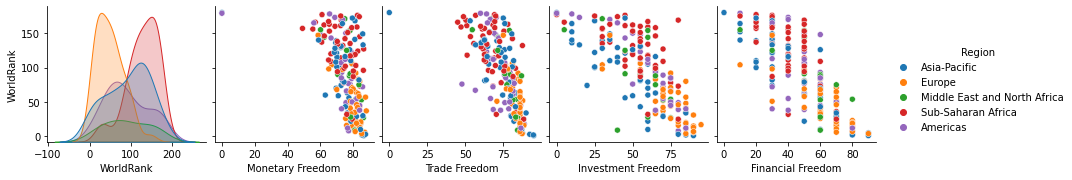

In [44]:
sns.pairplot(data=a , x_vars=['WorldRank','Monetary Freedom', 'Trade Freedom', 'Investment Freedom',
       'Financial Freedom'], y_vars='WorldRank',hue='Region',diag_kind='auto')

# Regression Analysis

In [42]:
x = data.drop(['Country Name','Region', 'WorldRank','RegionRank', '2019Score','TariffRateinPercentage',
       'IncomeTaxRateinPercentage', 'CorporateTaxRateinPercentage',
       'TaxBurdenPercentofGDP', 'Gov Expenditure percent of GDP',
       'PopulationinMillions', 'GDPinBillionsPPP', 'GDP Growth Rate Percent',
       '5 Year GDP Growth Rate Percent', 'GDPPerCapitaPPP',
       'Unemployment Percent', 'Inflation Percent', 'FDI Inflow in Millions',
       'Public Debt Percent of GDP'],axis=1)
y = data['WorldRank']

In [43]:
li=x.columns

print('List of the variables used to measure Economic Freedom Index : \n'
      ,li)

List of the variables used to measure Economic Freedom Index : 
 Index(['Property Rights', 'Judical Effectiveness', 'Government Integrity',
       'Tax Burden', 'Government Spending', 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom', 'Financial Freedom'],
      dtype='object')


In [44]:
x.isnull().sum()

Property Rights          1
Judical Effectiveness    1
Government Integrity     1
Tax Burden               6
Government Spending      3
Fiscal Health            3
Business Freedom         1
Labor Freedom            2
Monetary Freedom         2
Trade Freedom            4
Investment Freedom       2
Financial Freedom        5
dtype: int64

In [45]:
x=x.fillna(0)
x

Property Rights  Judical Effectiveness  Government Integrity  \
CountryID                                                                 
1                     19.6                   29.6                  25.2   
2                     54.8                   30.6                  40.4   
3                     31.6                   36.2                  28.9   
4                     35.9                   26.6                  20.5   
5                     47.8                   44.5                  33.5   
...                    ...                    ...                   ...   
179                    7.6                   13.1                   7.9   
180                   49.8                   40.3                  34.0   
181                   19.6                   22.2                  20.3   
182                   45.0                   35.6                  32.3   
183                   29.7                   24.8                  15.8   

           Tax Burden  Government Spending  Fiscal Health  Business Freedom  \
CountryID                                                                     
1                91.7                 80.3           99.3              49.2   
2                86.3                 73.9           80.6              69.3   
3                76.4                 48.7           18.7              61.6   
4                83.9                 80.7           58.2              55.7   
5                69.3                 49.5           33.0              56.4   
...               ...                  ...            ...               ...   
179              74.7                 58.1           17.6              33.9   
180              79.7                 74.1           40.7              63.5   
181               0.0                 83.7            0.0              45.1   
182              72.3                 80.1           12.3              71.1   
183              62.3                 74.5           23.7              33.4   

           Labor Freedom  Monetary Freedom  Trade Freedom  Investment Freedom  \
CountryID                                                                       
1                   60.4              76.7           66.0                10.0   
2                   52.7              81.5           87.8                70.0   
3                   49.9              74.9           67.4                30.0   
4                   58.8              55.4           61.2                30.0   
5                   46.9              60.2           70.0                55.0   
...                  ...               ...            ...                 ...   
179                 28.0               0.0           60.0                 0.0   
180                 62.8              68.9           79.2                30.0   
181                 49.8              61.5           71.4                50.0   
182                 46.0              70.3           72.6                55.0   
183                 43.3              72.4           70.0                25.0   

           Financial Freedom  
CountryID                     
1                       10.0  
2                       70.0  
3                       30.0  
4                       40.0  
5                       60.0  
...                      ...  
179                     10.0  
180                     40.0  
181                      0.0  
182                     50.0  
183                     10.0  

[186 rows x 12 columns]

In [46]:
x.isnull().sum()

Property Rights          0
Judical Effectiveness    0
Government Integrity     0
Tax Burden               0
Government Spending      0
Fiscal Health            0
Business Freedom         0
Labor Freedom            0
Monetary Freedom         0
Trade Freedom            0
Investment Freedom       0
Financial Freedom        0
dtype: int64

In [47]:
x.dtypes

Property Rights          float64
Judical Effectiveness    float64
Government Integrity     float64
Tax Burden               float64
Government Spending      float64
Fiscal Health            float64
Business Freedom         float64
Labor Freedom            float64
Monetary Freedom         float64
Trade Freedom            float64
Investment Freedom       float64
Financial Freedom        float64
dtype: object

In [48]:
x.count()

Property Rights          186
Judical Effectiveness    186
Government Integrity     186
Tax Burden               186
Government Spending      186
Fiscal Health            186
Business Freedom         186
Labor Freedom            186
Monetary Freedom         186
Trade Freedom            186
Investment Freedom       186
Financial Freedom        186
dtype: int64

# Correlation among 12 Factors of Economic Index

<AxesSubplot:>

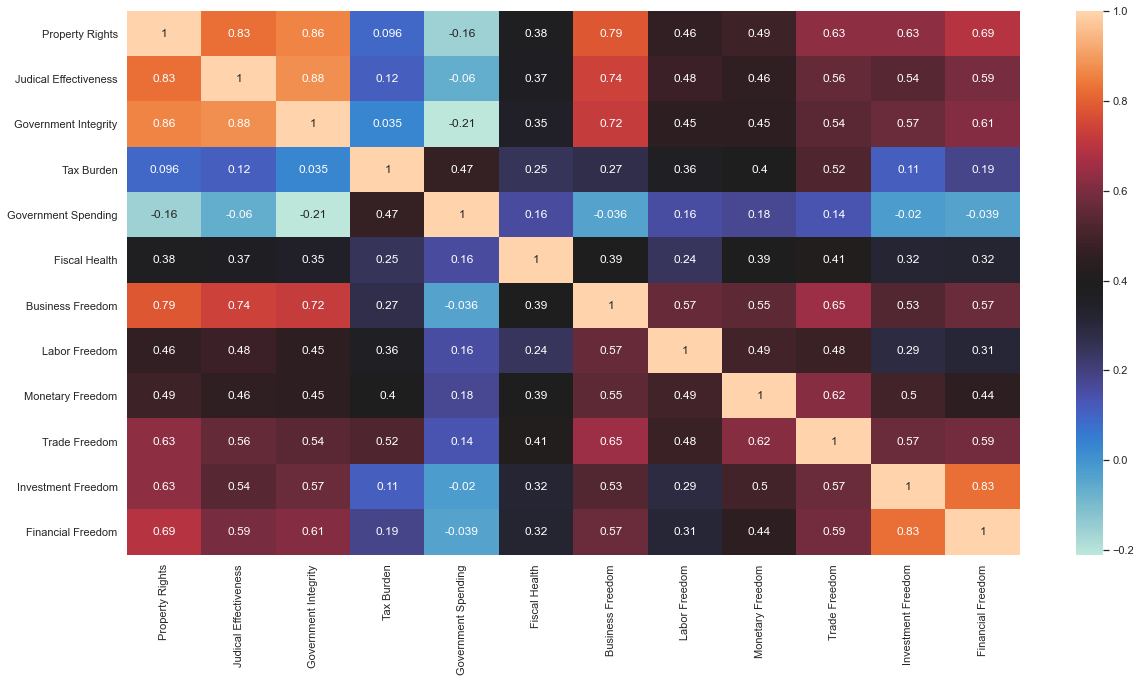

In [49]:
plt.figure(figsize=(20,10))
sns.heatmap(x.corr() ,cmap='icefire',annot=True)

In [23]:
y.isnull().sum()

6

In [24]:
y=y.fillna(0)
y

CountryID
1      152.0
2       52.0
3      171.0
4      156.0
5      148.0
       ...  
179    179.0
180    128.0
181      0.0
182    138.0
183    175.0
Name: WorldRank, Length: 186, dtype: float64

In [25]:
y.isnull().sum()

0

In [26]:
lr=LinearRegression()
lr

LinearRegression()

In [28]:
lr.fit(x,y)

LinearRegression()

In [29]:
lr.score(x,y)

0.735907382567492

In [30]:
lr.coef_

array([-0.83127383, -0.39632657,  0.30109358,  1.11469523, -0.168456  ,
       -0.37285197, -0.7810548 , -0.61065773,  0.61850936,  0.52032767,
       -0.49574005, -0.42340436])

In [31]:
lr.intercept_

137.36920825100944

In [66]:
pred = lr.predict(x)
pred=pd.DataFrame(pred)
pred

0
0    165.877094
1     90.993833
2    150.679421
3    116.274824
4     94.986011
..          ...
181  178.565976
182  115.491122
183   89.056616
184  107.288866
185  167.714463

[186 rows x 1 columns]

Text(0.5, 0, 'World Rank')

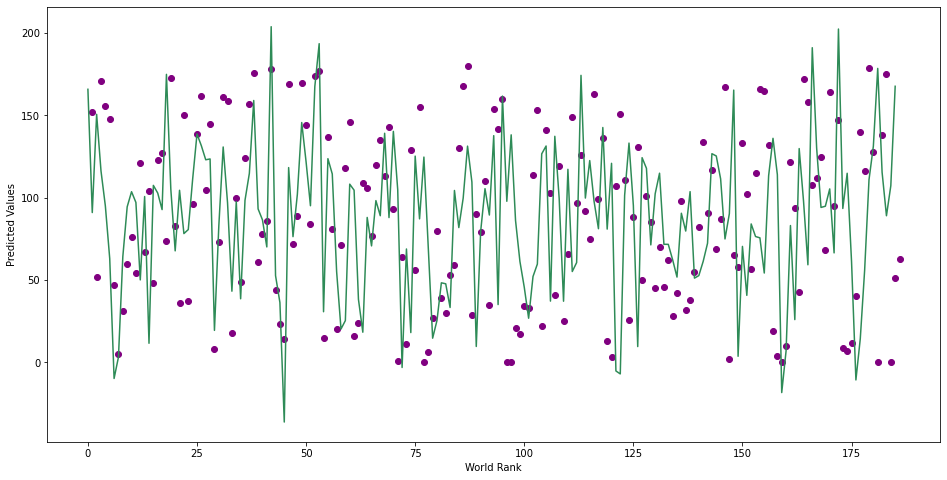

In [78]:
plt.figure(figsize=(16,8))
plt.scatter(y.index, y, color='purple')
plt.plot(pred, label='Predicted', color='seagreen')
plt.ylabel('Predicted Values')
plt.xlabel('World Rank')

In [43]:
from sklearn.model_selection import train_test_split
from sklearn import ensemble

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=12)

In [57]:
reg = ensemble.GradientBoostingRegressor( learning_rate = 0.018)
reg.fit(x_train, y_train)
reg.score(x_train, y_train)

0.9062724062044486

In [64]:
pred_reg = reg.predict(x)
pred_reg = pd.DataFrame(pred_reg)
pred_reg

0
0    132.257207
1     65.070693
2    145.884387
3    136.490866
4    116.674506
..          ...
181  150.321649
182  122.519439
183   26.354496
184  127.252549
185  150.321649

[186 rows x 1 columns]

Text(0.5, 0, 'World Rank')

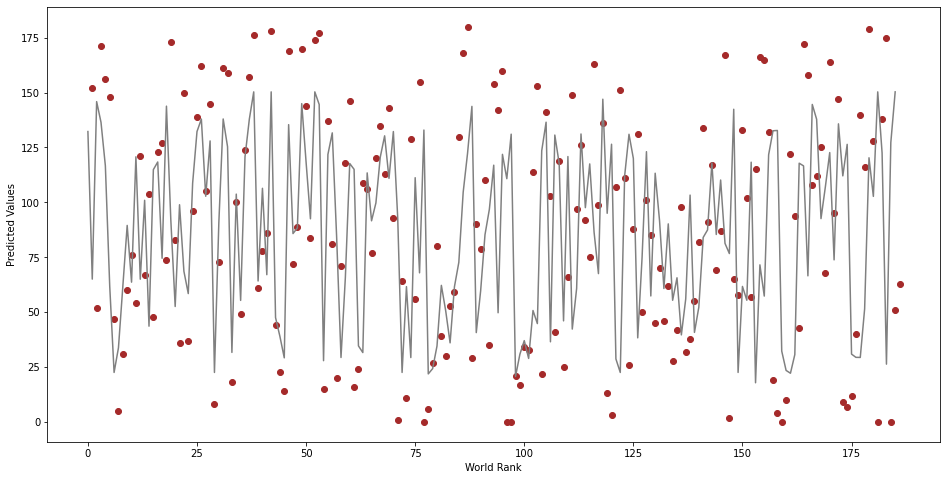

In [73]:
plt.figure(figsize=(16,8))
plt.scatter(y.index, y, color='brown')
plt.plot(pred_reg, label='Predicted', color='grey')
plt.ylabel('Predicted Values')
plt.xlabel('World Rank')

# Now let's check the correlation among World Rank and other factors

In [37]:
z=data.drop(['Country Name','Property Rights', 'Judical Effectiveness', 'Government Integrity',
       'Tax Burden', 'Government Spending', 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom', 'Financial Freedom'], axis=1)
z

Region  WorldRank  RegionRank  2019Score  \
CountryID                                                                   
1                          Asia-Pacific      152.0        39.0       51.5   
2                                Europe       52.0        27.0       66.5   
3          Middle East and North Africa      171.0        14.0       46.2   
4                    Sub-Saharan Africa      156.0        33.0       50.6   
5                              Americas      148.0        26.0       52.2   
...                                 ...        ...         ...        ...   
179                            Americas      179.0        32.0       25.9   
180                        Asia-Pacific      128.0        30.0       55.3   
181        Middle East and North Africa        NaN         NaN        NaN   
182                  Sub-Saharan Africa      138.0        27.0       53.6   
183                  Sub-Saharan Africa      175.0        45.0       40.4   

           TariffRateinPercentage  IncomeTaxRateinPercentage  \
CountryID                                                      
1                             7.0                       20.0   
2                             1.1                       23.0   
3                             8.8                       35.0   
4                             9.4                       17.0   
5                             7.5                       35.0   
...                           ...                        ...   
179                          10.0                       34.0   
180                           2.9                       35.0   
181                           4.3                        NaN   
182                           6.2                       35.0   
183                           5.0                       51.5   

           CorporateTaxRateinPercentage  TaxBurdenPercentofGDP  \
CountryID                                                        
1                                  20.0                    5.0   
2                                  15.0                   24.9   
3                                  23.0                   24.5   
4                                  30.0                   20.6   
5                                  30.0                   30.8   
...                                 ...                    ...   
179                                34.0                   14.9   
180                                22.0                   18.0   
181                                 NaN                    NaN   
182                                35.0                   17.9   
183                                25.0                   22.3   

           Gov Expenditure percent of GDP  PopulationinMillions  \
CountryID                                                         
1                                    25.6                  35.5   
2                                    29.5                   2.9   
3                                    41.4                  41.5   
4                                    25.3                  28.2   
5                                    41.0                  44.1   
...                                   ...                   ...   
179                                  37.4                  31.4   
180                                  29.4                  93.6   
181                                   NaN                  30.0   
182                                  25.8                  17.2   
183                                  29.2                  14.9   

           GDPinBillionsPPP  GDP Growth Rate Percent  \
CountryID                                              
1                      69.6                      2.5   
2                      36.0                      3.9   
3                     632.9                      2.0   
4                     190.3                      0.7   
5                     920.2                      2.9   
...                     ...                      ...   
179                

In [38]:
z.columns

Index(['Region', 'WorldRank', 'RegionRank', '2019Score',
       'TariffRateinPercentage', 'IncomeTaxRateinPercentage',
       'CorporateTaxRateinPercentage', 'TaxBurdenPercentofGDP',
       'Gov Expenditure percent of GDP', 'PopulationinMillions',
       'GDPinBillionsPPP', 'GDP Growth Rate Percent',
       '5 Year GDP Growth Rate Percent', 'GDPPerCapitaPPP',
       'Unemployment Percent', 'Inflation Percent', 'FDI Inflow in Millions',
       'Public Debt Percent of GDP'],
      dtype='object')

In [39]:
z.dtypes

Region                             object
WorldRank                         float64
RegionRank                        float64
2019Score                         float64
TariffRateinPercentage            float64
IncomeTaxRateinPercentage         float64
CorporateTaxRateinPercentage      float64
TaxBurdenPercentofGDP             float64
Gov Expenditure percent of GDP    float64
PopulationinMillions              float64
GDPinBillionsPPP                  float64
GDP Growth Rate Percent           float64
5 Year GDP Growth Rate Percent    float64
GDPPerCapitaPPP                   float64
Unemployment Percent              float64
Inflation Percent                 float64
FDI Inflow in Millions            float64
Public Debt Percent of GDP        float64
dtype: object

<AxesSubplot:>

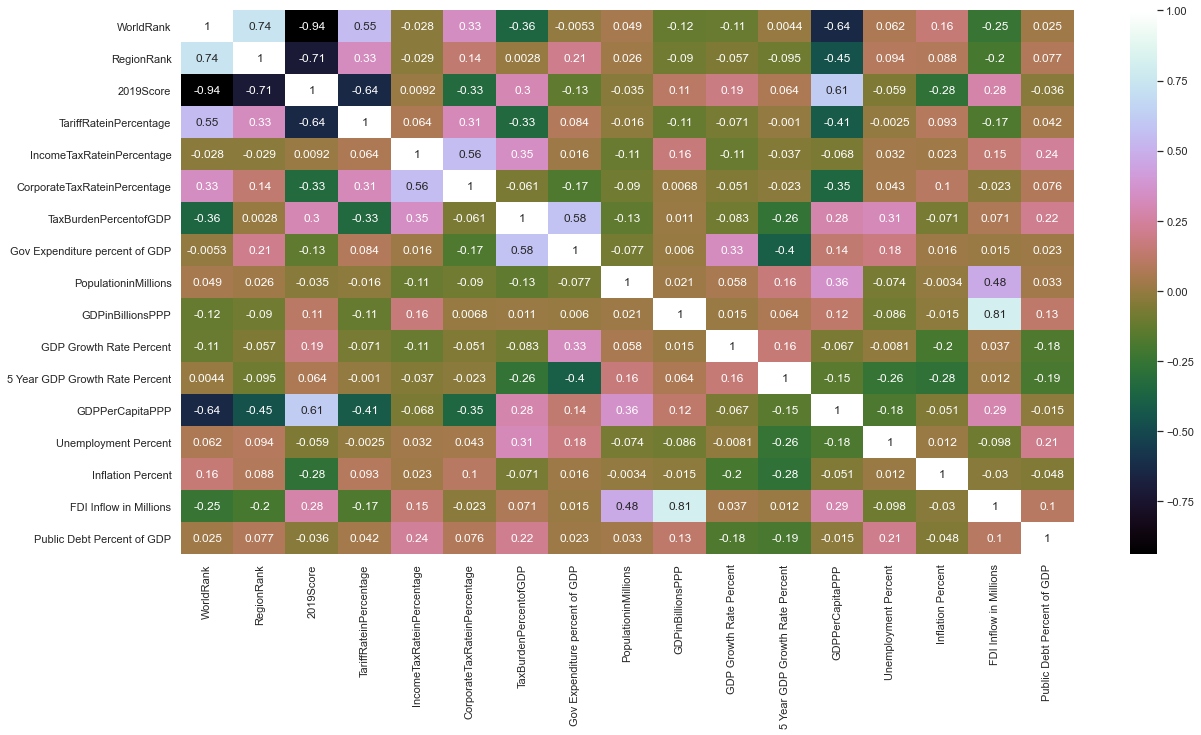

In [50]:
plt.figure(figsize=(20,10))
sns.heatmap(z.corr(),cmap='cubehelix' ,annot=True)